In [1]:
# importing modules and packages
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from io_utils import *
from plotting_utils import *
from analysis_utils import * 
from pathlib import Path
from sklearn.decomposition import PCA

# Load data into dictionary
with open('../data/full_traces.pickle', 'rb') as handle:
    dict = pickle.load(handle)

# possible ids for mice
subject_ids = [3095,3096,3097,4013,4014,4015,4016]

In [2]:
print(dict.keys())

dict_keys(['3095_d1_balbc_t1', '3095_d1_balbc_t2', '3095_d1_balbc_t3', '3095_d2_balbc_t1', '3095_d2_balbc_t2', '3095_d2_balbc_t3', '3095_d3_balbc_t1', '3095_d3_balbc_t2', '3095_d3_balbc_t3', '3095_d4_balbc_t1', '3095_d4_balbc_t2', '3095_d4_balbc_t3', '3095_d5_balbc_t1', '3095_d5_balbc_t2', '3095_d5_balbc_t3', '3095_d6_balbc_t1', '3095_d6_balbc_t2', '3095_d6_balbc_t3', '3095_d7_balbc_t1', '3095_d7_balbc_t2', '3095_d7_balbc_t3', '3095_d8_balbc_t1', '3095_d8_balbc_t2', '3095_d8_balbc_t3', '3095_d9_mCD1_t1', '3095_d9_mCD1_t2', '3095_d9_mCD1_t3', '3096_d1_balbc_t1', '3096_d1_balbc_t2', '3096_d1_balbc_t3', '3096_d2_balbc_t1', '3096_d2_balbc_t2', '3096_d2_balbc_t3', '3096_d3_balbc_t1', '3096_d3_balbc_t2', '3096_d3_balbc_t3', '3096_d4_balbc_t1', '3096_d4_balbc_t2', '3096_d4_balbc_t3', '3096_d5_balbc_t1', '3096_d5_balbc_t2', '3096_d5_balbc_t3', '3096_d6_balbc_t1', '3096_d6_balbc_t2', '3096_d6_balbc_t3', '3096_d7_balbc_t1', '3096_d7_balbc_t2', '3096_d7_balbc_t3', '3096_d8_balbc_t1', '3096_d8_bal

In [3]:
print(dict[f'{4015}_d3_balbc_t1'].columns)

Index(['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)',
       'BNST (E)', 'BNST (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)',
       'VMH (E)', 'VMH (I)', 'PAG (E)', 'PMv (E)', 'PMv (I)', 'LHb (E)',
       'PA (E)', 'PA (I)', 'NAc (DA)', 'unsupervised labels',
       'supervised labels'],
      dtype='object')


In [4]:
print(check_exist(mouseId='all',path=None))

(True, PosixPath('/Users/lencacuturela/Desktop/Research/github/Falkner_Multi-region_Aggression/data/all.csv'))


In [5]:
load_and_wrangle(mouseId=3095, path=None, overwrite=False)


,subject,other,day,trial,PrL (E),PrL (I),vLS (E),vLS (I),POA (E),POA (I),...,BNST (I),AH (E),AH (I),MeA (E),MeA (I),VMH (E),VMH (I),NAc (DA),unsupervised labels,supervised labels
0,3095,balb,1,1,0.681607,0.894658,-0.888269,-0.843799,-0.340110,-1.034221,...,-1.648179,-0.129511,-1.166632,-0.772297,-0.993607,-0.569781,-0.558806,-1.871317,1,0
1,3095,balb,1,1,0.599326,0.957647,-0.946083,-0.881617,-0.430450,-1.054411,...,-1.709684,-0.124798,-1.173829,-0.841737,-0.971336,-0.587014,-0.547735,-1.949758,1,0
2,3095,balb,1,1,0.529126,1.051173,-0.994299,-0.907692,-0.535689,-1.068503,...,-1.753816,-0.129743,-1.170172,-0.897480,-0.939654,-0.608288,-0.536162,-2.023673,3,0
3,3095,balb,1,1,0.477263,1.178564,-1.027632,-0.918032,-0.639095,-1.074397,...,-1.777767,-0.138694,-1.153331,-0.928521,-0.897453,-0.629716,-0.522479,-2.087047,1,0
4,3095,balb,1,1,0.450483,1.342303,-1.040390,-0.908681,-0.720142,-1.070106,...,-1.779105,-0.144091,-1.121065,-0.924095,-0.843792,-0.645983,-0.504840,-2.133982,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550494,3095,mCD1,9,3,-0.517376,0.028028,-0.286235,0.171975,0.419989,0.265408,...,0.692738,0.587366,-0.036304,-0.334573,-0.784807,0.131090,-0.256507,-0.459642,5,0
550495,3095,mCD1,9,3,-0.523437,0.018300,-0.280179,0.183931,0.427692,0.297241,...,0.708290,0.519514,-0.000576,-0.338022,-0.779681,0.146089,-0.193601,-0.465825,5,0
550496,3095,mCD1,9,3,-0.505564,-0.006451,-0.260025,0.199777,0.474664,0.332443,...,0.714543,0.466651,0.029616,-0.335869,-0.796449,0.201479,-0.120934,-0.465455,5,0
550497,3095,mCD1,9,3,-0.443457,-0.057206,-0.226219,0.219679,0.592526,0.367762,...,0.704183,0.470787,0.048328,-0.322595,-0.849698,0.316050,-0.044132,-0.459884,5,0


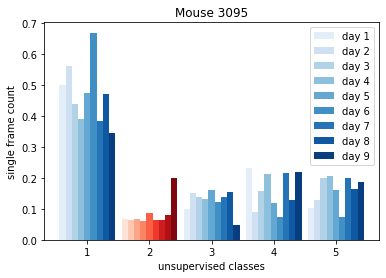

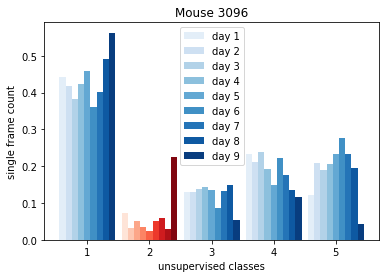

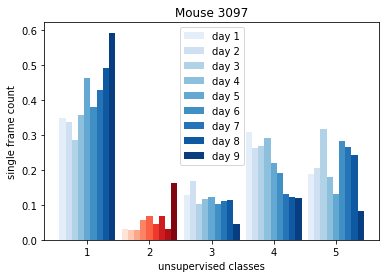

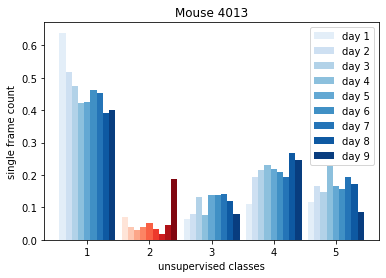

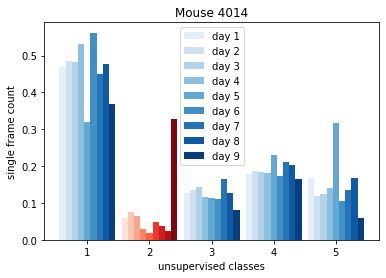

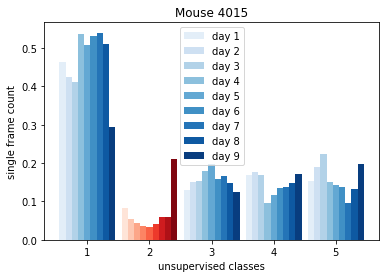

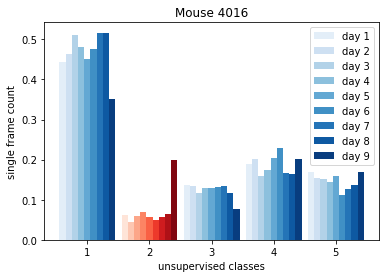

In [6]:
for mouseId in subject_ids:
    singleFrameBehavioralDistribution(mouseId=mouseId, path=None, daysType='per day',labeltype='unsupervised')

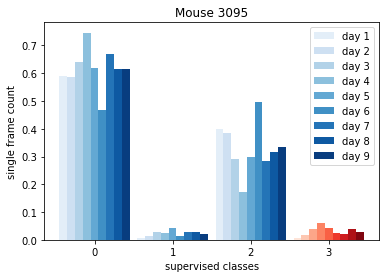

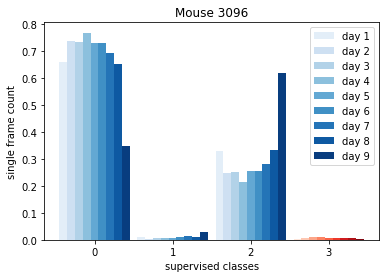

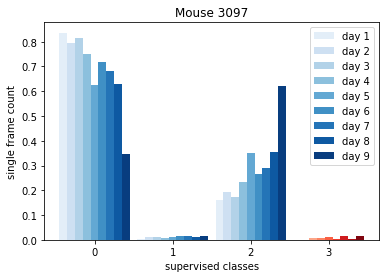

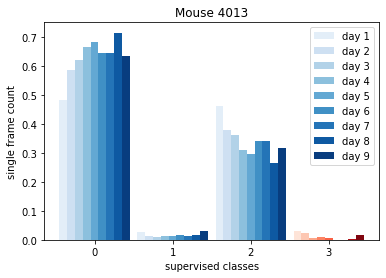

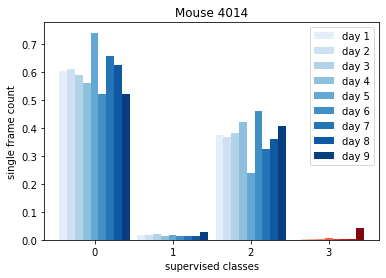

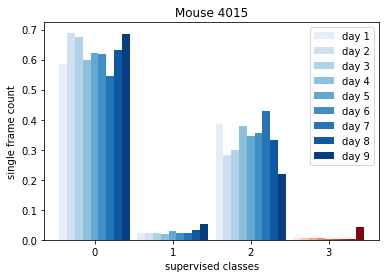

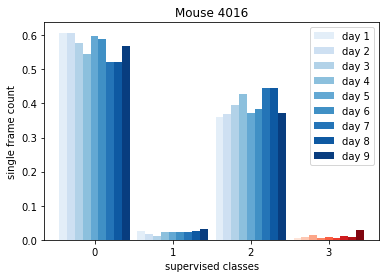

In [7]:
for mouseId in subject_ids:
    singleFrameBehavioralDistribution(mouseId=mouseId, path=None, daysType='per day',labeltype='supervised')

In [8]:
# creating dataframes for each animal
# for id in subject_ids:
#     load_and_wrangle(mouseId=id, path=None, overwrite=True)

Variance for each brain region
[0.14779717 0.04421218 0.08908049 0.03551362 0.16945907 0.07587813
 0.09675992 0.06006238 0.23102562 0.01704771 0.27294888 0.12655844
 0.30613906 0.05618241 0.09706614]


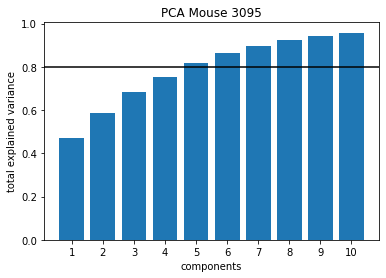

Variance for each brain region
[0.1291243  0.08209382 0.07613123 0.07566453 0.04179594 0.08616817
 0.17935203 0.04136477 0.36387848 0.17401684 0.18403019 0.03657991]


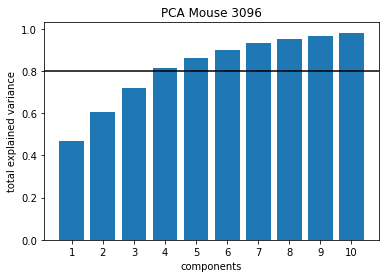

Variance for each brain region
[0.16138692 0.0397278  0.07423242 0.02669843 0.11893217 0.018914
 0.05928142 0.06796887 0.11168714 0.0458243  0.15558459 0.03387475
 0.09041991]


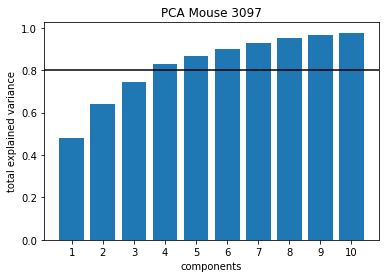

Variance for each brain region
[0.20251347 0.02323442 0.08832494 0.06219931 0.34305484 0.14045052
 0.20520221 0.26248586 0.05888235 0.1373711  0.33932789 0.18077644
 0.08882393]


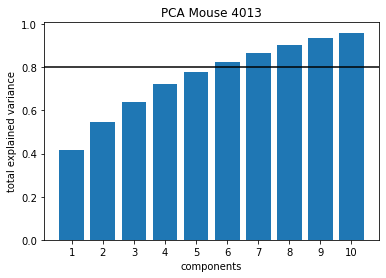

Variance for each brain region
[0.13892657 0.03215237 0.10003092 0.08999547 0.101798   0.02248303
 0.17599019 0.04047509 0.37179347 0.12576267 0.20974839 0.04833083
 0.11890297 0.29416157 0.07771769 0.11696405 0.32668018 0.26851431
 0.09849802]


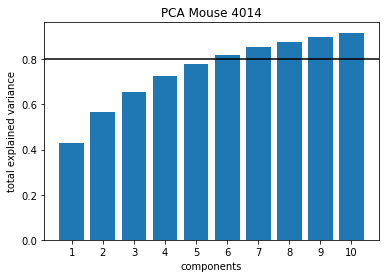

Variance for each brain region
[0.12251396 0.03479182 0.09655425 0.0831516  0.11280438 0.01986049
 0.13485698 0.05583553 0.22140894 0.03120859 0.30410917 0.10166009
 0.19873056 0.07700476 0.15841668 0.36978365 0.11354525 0.07086687
 0.25039601 0.11893721 0.11808783]


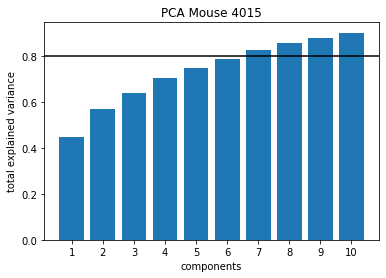

Variance for each brain region
[0.13272511 0.07365923 0.09337994 0.04779116 0.15730053 0.04195699
 0.20471887 0.06458656 0.06770492 0.01804892 0.28968153 0.11324833
 0.25982133 0.16282396 0.37905178 0.1692331  0.10727583 0.25014934
 0.19752288 0.14505155]


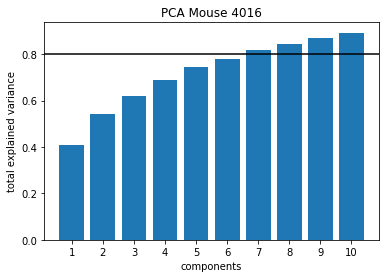

In [2]:
for mouseId in subject_ids:
    PCAfunction(mouseId=mouseId, path=None, type=None)